## Exploratory Data Analysis on Pollution Dataset

##### Using PM10 values in Lehen (fine dust, Feinstaub) to answer the following questions:
###### (a) How many missing values do we have? If yes, can we just skip them?
###### (b) Did you see any unnormal PM10 values? How can you graphically assess this best?
###### (c) Show the distribution of PM10.
###### (d) How many times did PM10 exceed the limit in the whole year? With which standard plot can you assess this information graphically best?
###### (e) Do PM10 values have a relationship with the following variables: O3, PM10 in Rudolfsplatz, air temperature in Lehen and wind speed? Is the relationship linear or nonlinear?
###### (f) (*) Does PM10 vary throughout the day?

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

In [ ]:
pollution_data = pd.read_csv('datasets/pollutionData.csv') #load data from
pollution_data.head(100)

,PM10Lehen,NOXLehen,RFLehen,LTLehen,O3Lehen,PM10Rud,MOXRud,RPRud,LTRud,CORud,WG,WT,GS
0,642.2,77.4,83.0,0.1,2.0,251.8,67.0,81.0,0.7,0.60,2.7,153.0,5.0
1,336.1,47.4,81.0,0.3,2.0,244.2,133.8,78.0,0.9,0.77,3.7,156.0,5.0
2,242.7,42.5,80.0,0.2,2.0,282.3,145.9,81.0,0.2,0.89,2.9,166.0,4.0
3,201.1,41.1,82.0,-0.3,2.0,362.4,177.1,79.0,0.7,0.77,2.5,137.0,4.0
4,165.7,38.2,83.0,-0.5,2.0,281.0,116.7,77.0,0.6,0.62,1.8,144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.6,18.7,87.0,0.3,20.0,21.5,55.0,94.0,-0.6,0.47,2.6,147.0,6.0
96,14.6,16.9,87.0,0.0,21.0,19.8,41.7,93.0,-0.7,0.42,2.8,153.0,5.0
97,15.3,16.4,87.0,-0.1,21.0,17.3,54.6,93.0,-1.0,0.41,2.8,148.0,6.0
98,16.2,17.5,87.0,-0.3,19.0,13.9,48.3,93.0,-1.1,0.40,3.1,152.0,5.0


In [ ]:
pollution_data.isna().sum()   #check the number of missing values per column

PM10Lehen    1046
NOXLehen      420
RFLehen        16
LTLehen        16
O3Lehen       644
PM10Rud        64
MOXRud        387
RPRud           2
LTRud           2
CORud         381
WG            286
WT            286
GS             42
dtype: int64

In [ ]:
pollution_data.isna().sum().sum()   #the total missin values from the dataset

np.int64(3592)

In [ ]:
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10Lehen  16474 non-null  float64
 1   NOXLehen   17100 non-null  float64
 2   RFLehen    17504 non-null  float64
 3   LTLehen    17504 non-null  float64
 4   O3Lehen    16876 non-null  float64
 5   PM10Rud    17456 non-null  float64
 6   MOXRud     17133 non-null  float64
 7   RPRud      17518 non-null  float64
 8   LTRud      17518 non-null  float64
 9   CORud      17139 non-null  float64
 10  WG         17234 non-null  float64
 11  WT         17234 non-null  float64
 12  GS         17478 non-null  float64
dtypes: float64(13)
memory usage: 1.7 MB


##### (a). The total missing values in the dataset is 3,592. Although this may be just a small fraction of the entire data points under consideration, the nature of the data themselves does not support skipping them. For time series datasets like the pollutionData, the data points are often related to one another in such a way that datapoint is often dependent on what previous measurement was and vice versa. So, in such cases, skipping or merely replacing with the average values may not be advised as it could distort the underlying data structure and relationship.

In [ ]:
pm10 = pollution_data['PM10Lehen']
pm10.describe()   #to describe the column data

count    16474.000000
mean        20.874948
std         17.172301
min          0.100000
25%          9.400000
50%         16.500000
75%         27.600000
max        642.200000
Name: PM10Lehen, dtype: float64

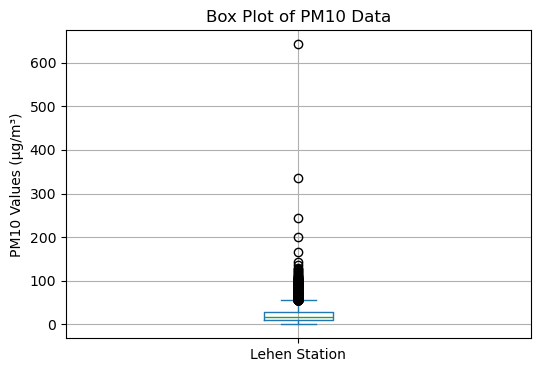

In [ ]:
# (b). to show the unnormal data
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
pm10.plot(kind='box')
plt.title('Box Plot of PM10 Data')
plt.ylabel('PM10 Values (µg/m³)')
plt.xticks([1], ['Lehen Station']) # Add a label for the box
plt.grid(True) # Add a grid for better readability
plt.show() # Display the plot

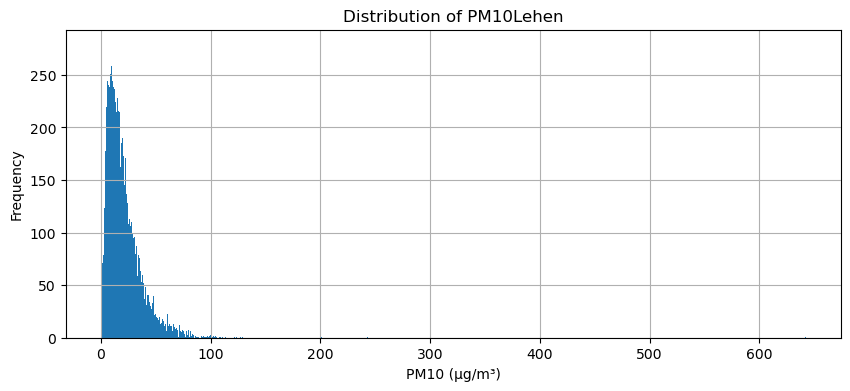

In [ ]:
# (c). to show the distrubution of the data
plt.figure(figsize=(10,4))
pm10.hist(bins=1600)
plt.title('Distribution of PM10Lehen')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# computing the z-score from the data
z_score = (pm10 - pm10.mean())/pm10.std()
outliers = pm10[np.abs(z_score)>3]
print(outliers.count())

239


##### Regulation from the document: Fine Dust (PM10): Daily mean 50 µg/m³ at a maximum of 35 allowed exceedances per year, Annual mean 40 µg/m³	0-63 exceedances JMW: up to 35 µg/m³

##### So if we assume the dataset for for particular yeare under review, and we have range index at 17520, then for 17520/365, gives 48 measurements daily. And if we also assume these measurements were 24/48, then we can say that these measurements were taken every 30mins or 0.5hrs.


In [ ]:
num_days = 365
measurements_per_day = 48

# Create an array that repeats each day number 48 times
days = np.repeat(np.arange(num_days), measurements_per_day)
pollution_data['Day'] = days[:len(pollution_data)]
#to compute the daily average
daily_avg = pollution_data.groupby('Day')['PM10Lehen'].mean()
# Count the number of days where the daily average exceeds 50 µg/m³
exceedance_count = (daily_avg > 50).sum()
print(f"The number of times the PM10 exceeded the limit in that year is: {exceedance_count} times.")

The number of times the PM10 exceeded the limit in that year is: 19 days.


#### This is less than the 35, which is maximum allowed exceedance per year for PM10 in Lehen.

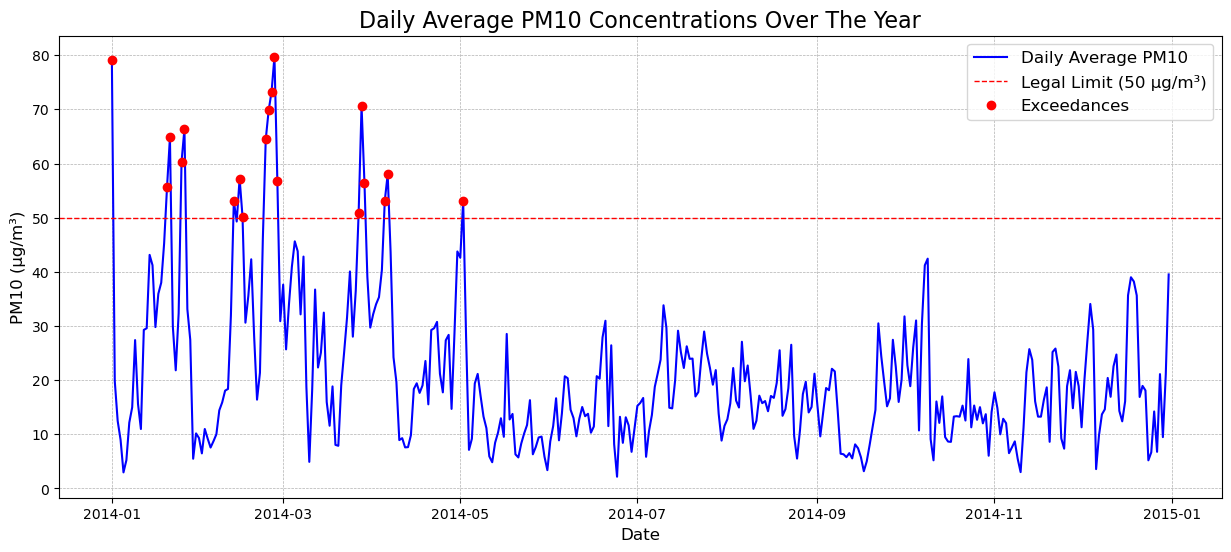

In [ ]:

# This code will add a conceptual date index for better plotting

# Create a sample date index to correspond with your daily data
num_days = len(daily_avg)
date_range = pd.date_range(start='2014-01-01', periods=num_days, freq='D')
daily_avg.index = date_range

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg.values, label='Daily Average PM10', color='blue')

# Add a horizontal line for the legal limit (50 µg/m³)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label='Legal Limit (50 µg/m³)')

# Add a marker for each day that exceeded the limit
exceeded_days = daily_avg[daily_avg > 50]
plt.plot(exceeded_days.index, exceeded_days.values, 'ro', label='Exceedances')

# Add titles and labels
plt.title('Daily Average PM10 Concentrations Over The Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM10 (µg/m³)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

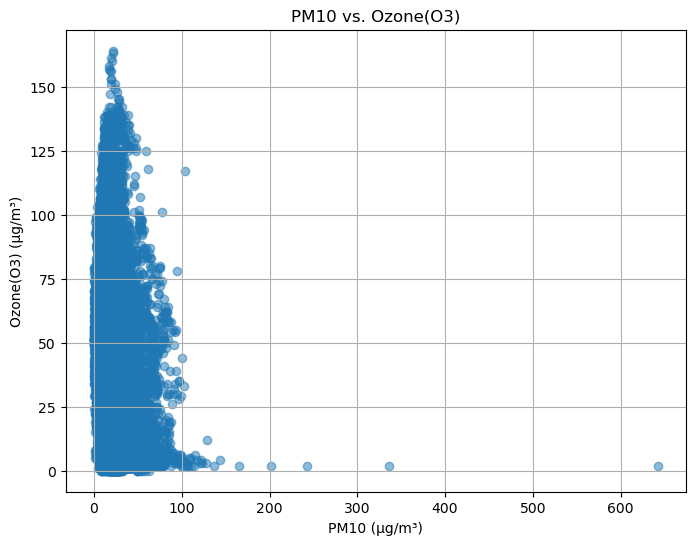

,PM10Lehen,O3Lehen
PM10Lehen,1.000000,-0.199326
O3Lehen,-0.199326,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pollution_data['PM10Lehen'], pollution_data['O3Lehen'], alpha=0.5)
plt.title('PM10 vs. Ozone(O3)')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Ozone(O3) (µg/m³)')
plt.grid(True)
plt.show()
pollution_data[['PM10Lehen','O3Lehen']].corr()


###### (e)i. There is a very weak relationship between PM10 and O3 in Lehen.

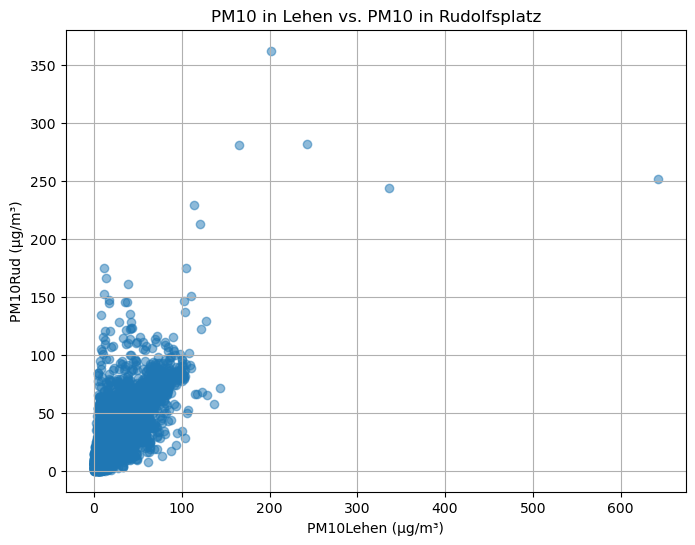

,PM10Lehen,PM10Rud
PM10Lehen,1.000000,0.772631
PM10Rud,0.772631,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pollution_data['PM10Lehen'], pollution_data['PM10Rud'], alpha=0.5)
plt.title('PM10 in Lehen vs. PM10 in Rudolfsplatz')
plt.xlabel('PM10Lehen (µg/m³)')
plt.ylabel('PM10Rud (µg/m³)')
plt.grid(True)
plt.show()
pollution_data[['PM10Lehen','PM10Rud']].corr()

###### (e)ii. There is a very strong relationship between PM10 and O3 in Lehen.

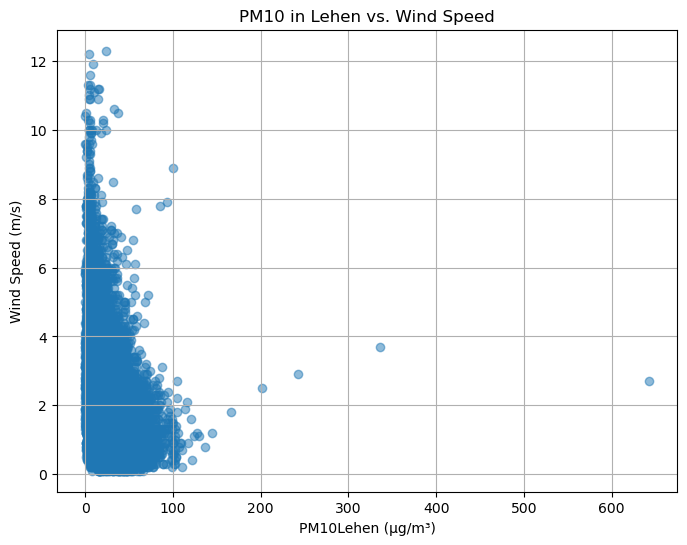

,PM10Lehen,WG
PM10Lehen,1.000000,-0.291212
WG,-0.291212,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pollution_data['PM10Lehen'], pollution_data['WG'], alpha=0.5)
plt.title('PM10 in Lehen vs. Wind Speed')
plt.xlabel('PM10Lehen (µg/m³)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()
pollution_data[['PM10Lehen','WG']].corr()

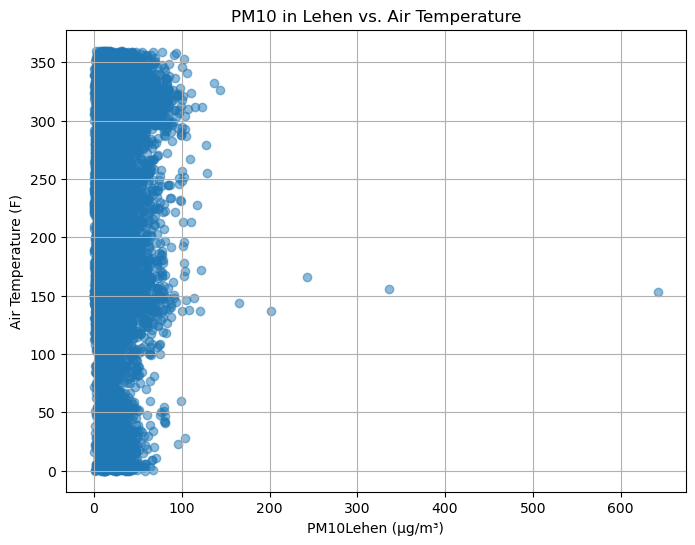

,PM10Lehen,WT
PM10Lehen,1.000000,0.137159
WT,0.137159,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pollution_data['PM10Lehen'], pollution_data['WT'], alpha=0.5)
plt.title('PM10 in Lehen vs. Air Temperature')
plt.xlabel('PM10Lehen (µg/m³)')
plt.ylabel('Air Temperature (F)')
plt.grid(True)
plt.show()
pollution_data[['PM10Lehen','WT']].corr()